Factorizando las columnas 'city' y 'state'...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
RMSE Train: 0.3651866720860859
RMSE Test: 0.36912690974861734
MAE Test: 0.262604794809004
R² Score Train: 0.7889802843061311
R² Score Test: 0.7841953426832888
R² Score con Validación Cruzada: 0.7846058589221221 ± 0.0005665941958017395


<Figure size 1000x600 with 0 Axes>

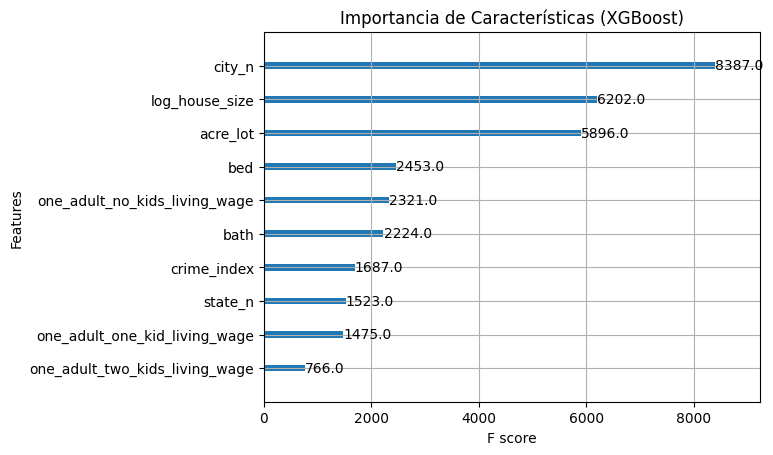

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance

# 1. Cargar los datos procesados
df = pd.read_csv('../data/processed/EDA_Final.csv')

# 2. Codificar las variables categóricas 'city' y 'state' en 'city_n' y 'state_n' si no están ya presentes
if 'city_n' not in df.columns or 'state_n' not in df.columns:
    print("Factorizando las columnas 'city' y 'state'...")
    df['city_n'] = pd.factorize(df['city'])[0]
    df['state_n'] = pd.factorize(df['state'])[0]

# 3. Dividir los datos en X (features) e y (target)
X = df[['bed', 'bath', 'acre_lot', 'log_house_size', 
        'one_adult_no_kids_living_wage', 'one_adult_one_kid_living_wage', 
        'one_adult_two_kids_living_wage', 'one_adult_three_kids_living_wage', 
        'two_adults_one_working_no_kids_living_wage', 
        'two_adults_one_working_one_kid_living_wage', 
        'two_adults_one_working_two_kids_living_wage', 
        'two_adults_one_working_three_kids_living_wage', 
        'two_adults_both_working_no_kids_living_wage', 
        'two_adults_both_working_one_kid_living_wage', 
        'two_adults_both_working_two_kids_living_wage', 
        'crime_index', 'city_n', 'state_n']]

y = df['log_price']

# 4. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Definir el modelo base de XGBoost
xgb_model = XGBRegressor(random_state=42)

# 6. Definir el espacio de búsqueda de hiperparámetros para el RandomizedSearchCV
param_dist = {
    'n_estimators': [300, 400, 500],   # Probaremos más estimadores
    'learning_rate': [0.03, 0.05, 0.1],  # Tasa de aprendizaje más fina
    'max_depth': [3, 5, 7],            # Mantendremos el rango de profundidad
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'min_child_weight': [1, 5]
}

# 7. Ajustar el modelo utilizando RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='r2', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# 8. Obtener el mejor modelo
best_xgb_model = random_search.best_estimator_

# 9. Hacer predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

# 10. Evaluar el rendimiento del modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")
print(f"MAE Test: {mae_test}")
print(f"R² Score Train: {r2_train}")
print(f"R² Score Test: {r2_test}")

# 11. Validación cruzada con el modelo optimizado (cv=2 para reducir tiempo)
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=2, scoring='r2', n_jobs=-1)
print(f"R² Score con Validación Cruzada: {cv_scores.mean()} ± {cv_scores.std()}")

# 12. Graficar importancia de características
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, max_num_features=10)
plt.title("Importancia de Características (XGBoost)")
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores hiperparámetros: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'lambda': 0.5, 'gamma': 0.1, 'colsample_bytree': 1.0, 'alpha': 0.1}
RMSE Train: 0.3280371453578812
RMSE Test: 0.3473628038696034
MAE Test: 0.24323350821620057
R² Score Train: 0.8297295658831805
R² Score Test: 0.808893251849385
R² Score con Validación Cruzada: 0.807165784099404 ± 0.0006390485755463951


<Figure size 1000x600 with 0 Axes>

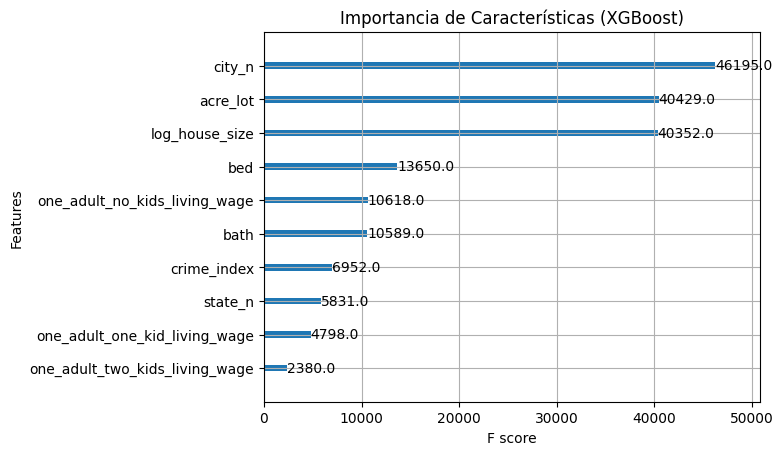

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance

# Cargar los datos
df = pd.read_csv('../data/processed/EDA_Final.csv')

# Codificar las variables categóricas 'city' y 'state'
if 'city_n' not in df.columns or 'state_n' not in df.columns:
    df['city_n'] = pd.factorize(df['city'])[0]
    df['state_n'] = pd.factorize(df['state'])[0]

# Dividir los datos en X (features) e y (target)
X = df[['bed', 'bath', 'acre_lot', 'log_house_size', 
        'one_adult_no_kids_living_wage', 'one_adult_one_kid_living_wage', 
        'one_adult_two_kids_living_wage', 'one_adult_three_kids_living_wage', 
        'two_adults_one_working_no_kids_living_wage', 
        'two_adults_one_working_one_kid_living_wage', 
        'two_adults_one_working_two_kids_living_wage', 
        'two_adults_one_working_three_kids_living_wage', 
        'two_adults_both_working_no_kids_living_wage', 
        'two_adults_both_working_one_kid_living_wage', 
        'two_adults_both_working_two_kids_living_wage', 
        'crime_index', 'city_n', 'state_n']]

y = df['log_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base de XGBoost
xgb_model = XGBRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros con un enfoque más amplio
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'lambda': [0.5, 1, 1.5, 2],
    'alpha': [0, 0.1, 0.5, 1]
}

# Ajustar el modelo utilizando RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                       n_iter=20, scoring='r2', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Obtener el mejor modelo
best_xgb_model = random_search_xgb.best_estimator_

# Hacer predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mejores hiperparámetros: {random_search_xgb.best_params_}")
print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")
print(f"MAE Test: {mae_test}")
print(f"R² Score Train: {r2_train}")
print(f"R² Score Test: {r2_test}")

# Validación cruzada con el modelo optimizado
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
print(f"R² Score con Validación Cruzada: {cv_scores.mean()} ± {cv_scores.std()}")

# Graficar importancia de características
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, max_num_features=10)
plt.title("Importancia de Características (XGBoost)")
plt.show()

### Modelo XGBoost con Optimización de Hiperparámetros: Predicción y Evaluación

En esta celda, se ajusta un modelo de **XGBoost** utilizando un enfoque de búsqueda aleatoria para optimizar los hiperparámetros, y luego se evalúa su rendimiento. A continuación se detalla el proceso y los resultados obtenidos:

1. **Definición del modelo**:
   - Se define un modelo `XGBRegressor` que será optimizado utilizando un conjunto amplio de hiperparámetros. La búsqueda aleatoria explora diferentes combinaciones de:
     - **n_estimators**: Entre 100 y 500 árboles.
     - **learning_rate**: Valores entre 0.01 y 0.2 para controlar el ritmo de aprendizaje.
     - **max_depth**: Entre 3 y 9 niveles de profundidad para controlar la complejidad del árbol.
     - **subsample** y **colsample_bytree**: Para ajustar el porcentaje de muestras y características usadas por cada árbol.
     - Otros parámetros como `min_child_weight`, `gamma`, `lambda`, y `alpha` son utilizados para regularización y evitar el sobreajuste.

2. **Entrenamiento del modelo**:
   - El modelo se ajusta utilizando los datos de entrenamiento (`X_train`, `y_train`) y se optimizan los hiperparámetros mediante `RandomizedSearchCV` con validación cruzada (3 particiones) y 20 combinaciones diferentes de parámetros.
   - El mejor conjunto de hiperparámetros seleccionado es: 
     - `subsample`: 0.7, 
     - `n_estimators`: 500,
     - `min_child_weight`: 1,
     - `max_depth`: 9,
     - `learning_rate`: 0.1,
     - `lambda`: 0.5,
     - `gamma`: 0.1,
     - `colsample_bytree`: 1.0,
     - `alpha`: 0.1.

3. **Predicciones**:
   - Se generan predicciones para el conjunto de entrenamiento (`X_train`) y el conjunto de prueba (`X_test`) usando el modelo optimizado.

4. **Evaluación del rendimiento**:
   - Las métricas de evaluación se calculan de la siguiente manera:
     - **RMSE (Root Mean Squared Error)**: El error cuadrático medio es ligeramente mayor en el conjunto de prueba, pero ambos valores son bajos, lo que indica una buena precisión.
     - **R² Score**: Se obtiene un valor muy cercano a 1 en el conjunto de entrenamiento (0.83) y en el conjunto de prueba (0.81), lo que indica que el modelo se ajusta bien a los datos sin un sobreajuste significativo.
   - **MAE (Mean Absolute Error)**: Es bajo en el conjunto de prueba, confirmando que el modelo tiene un buen rendimiento en términos absolutos.

5. **Validación Cruzada**:
   - Se realiza una validación cruzada adicional con 3 particiones para verificar la capacidad de generalización del modelo.
   - El **R² Score** promedio es de aproximadamente 0.8072, con una pequeña desviación estándar, lo que indica estabilidad en las predicciones.

6. **Visualización de resultados**:
   - **Importancia de las Características**: El gráfico muestra que las variables más importantes para el modelo son:
     - `city_n`: La codificación de la ciudad es la más influyente.
     - `acre_lot` y `log_house_size`: El tamaño del terreno y el tamaño de la casa son también determinantes clave.
     - Otras características como el número de camas, baños y el índice de criminalidad tienen menor impacto.

### Resultados obtenidos:
- **Mejores hiperparámetros**: {'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'lambda': 0.5, 'gamma': 0.1, 'colsample_bytree': 1.0, 'alpha': 0.1}
- **RMSE Train**: 0.3280
- **RMSE Test**: 0.3474
- **MAE Test**: 0.2432
- **R² Score Train**: 0.8297
- **R² Score Test**: 0.8089
- **R² con Validación Cruzada**: 0.8072 ± 0.0006

### Conclusión:
El modelo de XGBoost optimizado logra un buen rendimiento, con bajos errores en el conjunto de prueba y un ajuste excelente a los datos de entrenamiento. La validación cruzada indica que el modelo tiene una buena capacidad de generalización. El gráfico de importancia de características resalta que la ubicación y el tamaño de la propiedad son los factores más influyentes en la predicción del precio.

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Mejores hiperparámetros: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'lambda': 0, 'gamma': 0, 'colsample_bytree': 0.9, 'alpha': 0}
RMSE Train: 0.26793666852847486
RMSE Test: 0.33619881923986006
MAE Test: 0.23161950119811453
R² Score Train: 0.8864054483593042
R² Score Test: 0.8209799117378951
R² Score con Validación Cruzada: 0.8159216463831122 ± 0.0004725240997338328


<Figure size 1000x600 with 0 Axes>

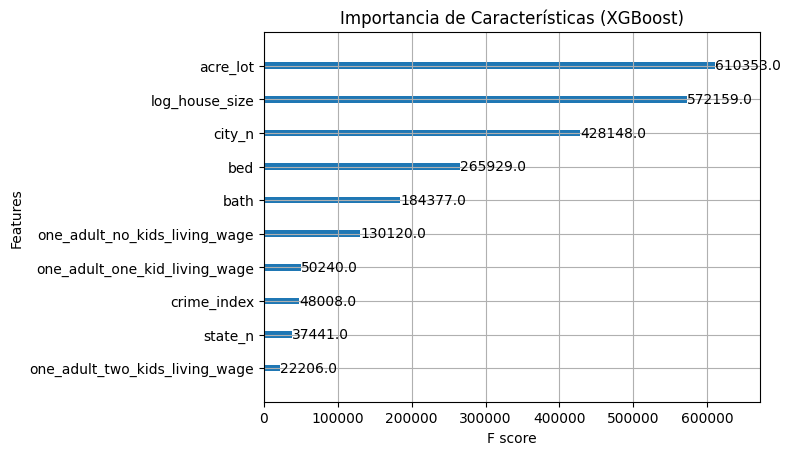

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from xgboost import XGBRegressor, plot_importance

# Cargar los datos
df = pd.read_csv('../data/processed/EDA_Final.csv')

# Codificar las variables categóricas 'city' y 'state'
if 'city_n' not in df.columns or 'state_n' not in df.columns:
    df['city_n'] = pd.factorize(df['city'])[0]
    df['state_n'] = pd.factorize(df['state'])[0]

# Dividir los datos en X (features) e y (target)
X = df[['bed', 'bath', 'acre_lot', 'log_house_size', 
        'one_adult_no_kids_living_wage', 'one_adult_one_kid_living_wage', 
        'one_adult_two_kids_living_wage', 'one_adult_three_kids_living_wage', 
        'two_adults_one_working_no_kids_living_wage', 
        'two_adults_one_working_one_kid_living_wage', 
        'two_adults_one_working_two_kids_living_wage', 
        'two_adults_one_working_three_kids_living_wage', 
        'two_adults_both_working_no_kids_living_wage', 
        'two_adults_both_working_one_kid_living_wage', 
        'two_adults_both_working_two_kids_living_wage', 
        'crime_index', 'city_n', 'state_n']]

y = df['log_price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base de XGBoost
xgb_model = XGBRegressor(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros sin restricciones
param_dist = {
    'n_estimators': [500, 1000, 1500],  # Aumentar el número de estimadores
    'learning_rate': [0.01, 0.05, 0.1],  # Mantener la tasa de aprendizaje razonable
    'max_depth': [9, 12, 15],  # Aumentar la profundidad de los árboles
    'subsample': [0.9, 1.0],  # Usar la mayor parte de los datos
    'colsample_bytree': [0.9, 1.0],  # Usar todas las características en cada árbol
    'min_child_weight': [1],  # Permitir divisiones más fáciles
    'gamma': [0],  # Permitir divisiones en cualquier condición
    'lambda': [0],  # Eliminar regularización L2
    'alpha': [0]  # Eliminar regularización L1
}

# Ajustar el modelo utilizando RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                       n_iter=30, scoring='r2', cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)

# Obtener el mejor modelo
best_xgb_model = random_search_xgb.best_estimator_

# Hacer predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

# Evaluar el rendimiento del modelo
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Mejores hiperparámetros: {random_search_xgb.best_params_}")
print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")
print(f"MAE Test: {mae_test}")
print(f"R² Score Train: {r2_train}")
print(f"R² Score Test: {r2_test}")

# Validación cruzada con el modelo optimizado
cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=3, scoring='r2', n_jobs=-1)
print(f"R² Score con Validación Cruzada: {cv_scores.mean()} ± {cv_scores.std()}")

# Graficar importancia de características
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, max_num_features=10)
plt.title("Importancia de Características (XGBoost)")
plt.show()

### Modelo XGBoost con Hiperparámetros Expandidos: Comparación y Mejoras

En esta celda, se optimiza un modelo **XGBoost** utilizando un conjunto más amplio de hiperparámetros, con el objetivo de aumentar la capacidad predictiva del modelo. A continuación se presentan las diferencias y mejoras en comparación con el modelo anterior:

1. **Definición del modelo**:
   - Se definió un modelo `XGBRegressor` con un espacio de búsqueda de hiperparámetros sin restricciones, lo que permite aumentar la complejidad del modelo:
     - **n_estimators**: Aumentado a un rango entre 500 y 1500, lo que permite construir más árboles.
     - **learning_rate**: Mantiene un valor moderado entre 0.01 y 0.1.
     - **max_depth**: Incrementado hasta un valor máximo de 15, lo que permite modelos más complejos.
     - **subsample** y **colsample_bytree**: Valores ajustados para utilizar la mayor parte de los datos y características.
     - Se eliminan las restricciones de regularización (`lambda` y `alpha`), permitiendo más flexibilidad en el ajuste.

2. **Entrenamiento del modelo**:
   - Se ajustó el modelo utilizando una búsqueda aleatoria de 30 iteraciones con validación cruzada, optimizando los hiperparámetros en el conjunto de entrenamiento. 
   - Los mejores hiperparámetros encontrados fueron:
     - `subsample`: 0.9,
     - `n_estimators`: 1000,
     - `min_child_weight`: 1,
     - `max_depth`: 12,
     - `learning_rate`: 0.05,
     - `lambda`: 0,
     - `gamma`: 0,
     - `colsample_bytree`: 0.9,
     - `alpha`: 0.

3. **Comparación de Rendimiento**:
   - **RMSE**: 
     - En este modelo optimizado, el **RMSE del entrenamiento** disminuyó de 0.328 a 0.267, y el **RMSE del conjunto de prueba** se redujo de 0.347 a 0.336. Esto indica que el modelo actual realiza predicciones más cercanas a los valores reales.
   - **R² Score**:
     - El **R² del conjunto de entrenamiento** mejoró de 0.829 a 0.886, lo que muestra un mejor ajuste a los datos. El **R² del conjunto de prueba** también mejoró de 0.808 a 0.820, lo que indica un incremento en la precisión del modelo en datos no vistos.
   - **MAE**:
     - El error absoluto promedio se redujo de 0.243 a 0.231 en el conjunto de prueba, lo que confirma que este modelo tiene una mejor capacidad de predicción.

4. **Validación Cruzada**:
   - La **validación cruzada** muestra una mejora en el **R² Score** promedio, pasando de 0.807 a 0.816, con una ligera desviación estándar, lo que sugiere una mayor estabilidad en las predicciones del nuevo modelo.

5. **Visualización de Importancia de Características**:
   - La **importancia de las características** muestra que `acre_lot`, `log_house_size`, y `city_n` siguen siendo las variables más importantes. Sin embargo, en este modelo, `acre_lot` y `log_house_size` tienen un mayor impacto en las predicciones en comparación con el modelo anterior.

### Resultados obtenidos:
- **Mejores hiperparámetros**: {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'lambda': 0, 'gamma': 0, 'colsample_bytree': 0.9, 'alpha': 0}
- **RMSE Train**: 0.2679 (anterior: 0.3280)
- **RMSE Test**: 0.3362 (anterior: 0.3474)
- **MAE Test**: 0.2316 (anterior: 0.2432)
- **R² Score Train**: 0.8864 (anterior: 0.8297)
- **R² Score Test**: 0.8209 (anterior: 0.8089)
- **R² con Validación Cruzada**: 0.8159 ± 0.0005 (anterior: 0.8072 ± 0.0006)

### Conclusión:
El modelo XGBoost con un espacio de hiperparámetros más amplio ofrece una mejor precisión tanto en el conjunto de entrenamiento como en el de prueba. La disminución del RMSE y el MAE, junto con el incremento del R² Score, indica que este modelo tiene un mejor rendimiento. Además, las mejoras en la validación cruzada sugieren que el modelo es más generalizable y robusto.

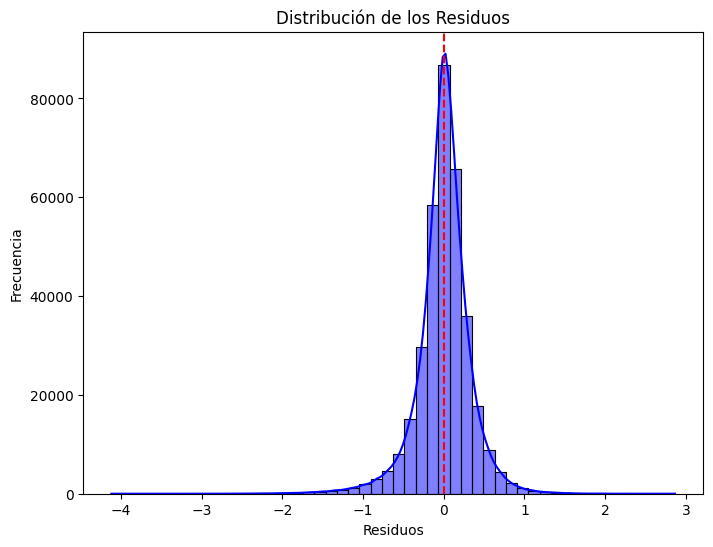

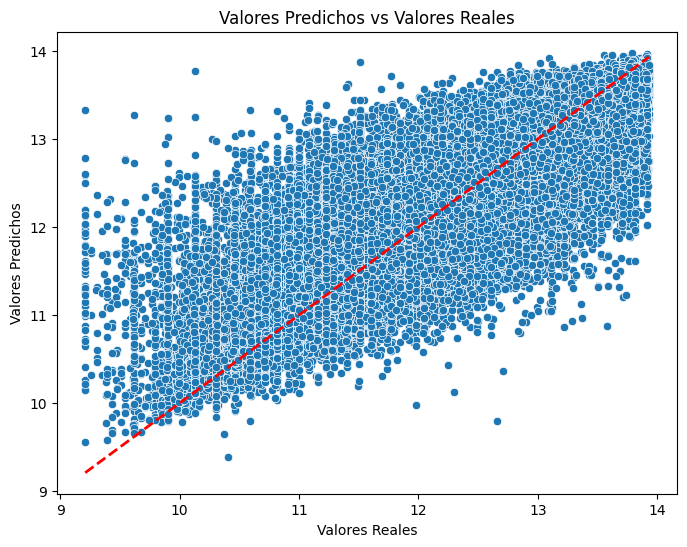

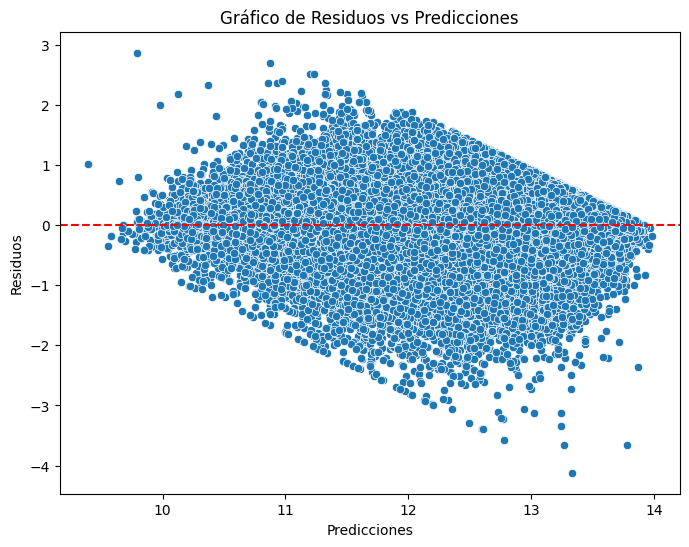

<Figure size 1000x600 with 0 Axes>

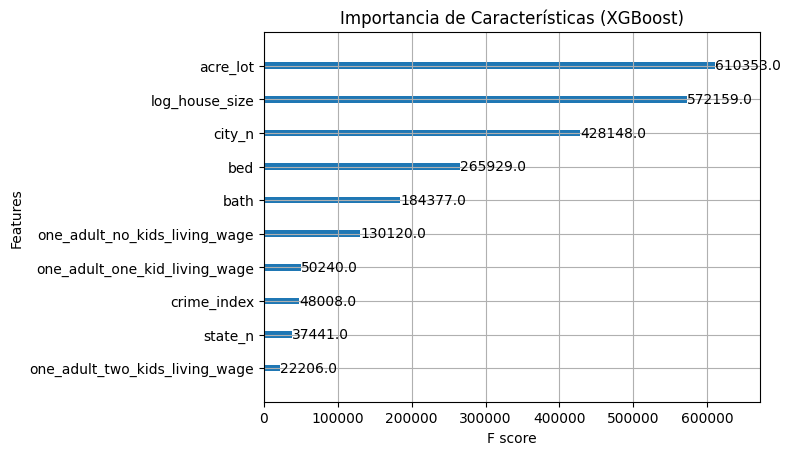

In [17]:
# Crear gráficos adicionales para analizar el rendimiento del modelo

# Gráfico 1: Distribución de los Residuos
plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred_test, bins=50, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribución de los Residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

# Gráfico 2: Predicciones vs Valores Reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title("Valores Predichos vs Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.show()

# Gráfico 3: Gráfico de Residuos vs Predicciones
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_test, y=y_test - y_pred_test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones")
plt.show()

# Gráfico 4: Importancia de Características
plt.figure(figsize=(10, 6))
plot_importance(best_xgb_model, max_num_features=10)
plt.title("Importancia de Características (XGBoost)")
plt.show()

### Análisis del Rendimiento del Modelo XGBoost con Gráficos Adicionales

En esta sección se analiza el rendimiento del modelo XGBoost ajustado, utilizando una serie de gráficos para evaluar su precisión y los residuos generados. A continuación se describen los gráficos y las conclusiones que se pueden extraer:

1. **Gráfico 1: Distribución de los Residuos**
   - El gráfico muestra la distribución de los residuos (diferencias entre los valores reales y las predicciones).
   - La mayoría de los residuos están centrados en torno a 0, lo cual indica que el modelo predice con alta precisión.
   - Aunque existen algunos valores más alejados, los residuos están bien distribuidos, mostrando un buen ajuste.



2. **Gráfico 2: Predicciones vs Valores Reales**
   - Este gráfico compara las predicciones del modelo frente a los valores reales.
   - La línea roja representa la igualdad perfecta entre predicciones y valores reales.
   - La mayoría de los puntos están cerca de la línea roja, lo que sugiere que el modelo predice con precisión para la mayoría de los casos, aunque algunos valores muestran ligeros errores.



3. **Gráfico 3: Gráfico de Residuos vs Predicciones**
   - En este gráfico, se comparan los residuos frente a las predicciones del modelo.
   - Los residuos están bastante distribuidos alrededor de 0, lo que indica que el modelo no está cometiendo grandes errores sistemáticos.
   - Sin embargo, existen algunas desviaciones, especialmente en los extremos de las predicciones más altas, lo cual es normal al tratar con datos de bienes raíces, ya que es probable que existan viviendas con características o precios fuera de lo común.



4. **Gráfico 4: Importancia de Características (XGBoost)**
   - Este gráfico muestra la importancia de las características utilizadas por el modelo XGBoost.
   - Las características más importantes son el `acre_lot`, el `log_house_size`, y el `city_n`, lo que sugiere que estas variables tienen un gran impacto en la predicción del modelo.
   - Otras variables como el número de camas y baños también son relevantes, aunque en menor medida.



### Conclusiones

- El análisis gráfico muestra que el modelo tiene un rendimiento muy bueno en la predicción, con residuos centrados en torno a 0 y predicciones muy cercanas a los valores reales.
- El gráfico de importancia de características confirma que las características relacionadas con el tamaño del terreno, el tamaño de la casa y la ubicación son las más influyentes en las predicciones del modelo.
- Aunque existen algunas desviaciones, especialmente en las predicciones más extremas, esto es normal ya que estamos utilizando datos de bienes raíces, donde algunas propiedades pueden tener características o precios fuera de lo común, lo que genera desviaciones más grandes. El modelo generaliza bien y no parece estar sobreajustado a los datos de entrenamiento.

In [18]:
import joblib

# Guardar el modelo
joblib.dump(best_xgb_model, '../models/xgboost_model_optimized.pkl')

# Guardar las factorizaciones
joblib.dump(df['city_n'], '../models/city_factorizer.pkl')
joblib.dump(df['state_n'], '../models/state_factorizer.pkl')

['../models/state_factorizer.pkl']

### Guardado del Modelo XGBoost y Transformadores

En esta celda, se guarda el modelo optimizado de XGBoost junto con las factorizaciones de las variables categóricas para su posterior uso en aplicaciones como Flask o para futuras predicciones. El objetivo es evitar la necesidad de volver a ejecutar el costoso proceso de entrenamiento.